In [1]:
import xarray as xr
#import celluloid
from roms_tools import Grid, ROMSOutput
from roms_regrid import *

In [2]:
grid=xr.open_dataset(
    "/home/x-uheede/S/Iceland3_MARBL_2024_60m/P_INPUT/Iceland3_grid_MAT.nc")


In [3]:
path=[
        "/home/x-uheede/S/Iceland3_MARBL_2024_60m_CDR/Iceland3_MARBL_2024_bgc_dia.20240217020000.nc",
        "/home/x-uheede/S/Iceland3_MARBL_2024_60m_CDR/Iceland3_MARBL_2024_bgc_dia.20240218020000.nc",
        "/home/x-uheede/S/Iceland3_MARBL_2024_60m_CDR/Iceland3_MARBL_2024_bgc_dia.20240219020000.nc",
        "/home/x-uheede/S/Iceland3_MARBL_2024_60m_CDR/Iceland3_MARBL_2024_bgc_dia.20240220020000.nc",
        "/home/x-uheede/S/Iceland3_MARBL_2024_60m_CDR/Iceland3_MARBL_2024_bgc_dia.20240221020000.nc",
        "/home/x-uheede/S/Iceland3_MARBL_2024_60m_CDR/Iceland3_MARBL_2024_bgc_dia.20240222020000.nc",
        "/home/x-uheede/S/Iceland3_MARBL_2024_60m_CDR/Iceland3_MARBL_2024_bgc_dia.20240223020000.nc",
    ]

In [4]:
roms_bgc=xr.open_mfdataset(path, combine='nested', concat_dim=["time"])

In [5]:
grid = Grid.from_file(
    "/home/x-uheede/S/Iceland3_MARBL_2024_60m/P_INPUT/Iceland3_grid_MAT.nc"
)

2025-11-19 12:38:39 - WARNING - Vertical coordinates (Cs_r, Cs_w) not found in grid file.
2025-11-19 12:38:39 - INFO - === Preparing the vertical coordinate system using N = 100, theta_s = 5.0, theta_b = 2.0, hc = 300.0 ===
2025-11-19 12:38:39 - INFO - Total time: 0.003 seconds
2025-11-19 12:38:39 - INFO - ================================================================================================


In [6]:
grid.update_vertical_coordinate(N=60, theta_s=5.0, theta_b=2.0, hc=300.0, verbose=False)

In [7]:
roms_output = ROMSOutput(
    grid=grid,
    path=path,
    use_dask=True,
)
ds_regridded = roms_output.regrid()

In [9]:
ds_regridded.load()

<xarray.Dataset> Size: 8GB
Dimensions:           (time: 168, lat: 965, lon: 1929)
Coordinates:
  * time              (time) datetime64[ns] 1kB 2024-02-17T02:00:00 ... 2024-...
  * lat               (lat) float32 4kB 64.0 64.0 64.0 64.0 ... 65.0 65.0 65.0
  * lon               (lon) float32 8kB 337.0 337.0 337.0 ... 339.0 339.0 339.0
Data variables:
    pCO2SURF          (time, lat, lon) float32 1GB nan nan nan ... nan nan nan
    FG_CO2            (time, lat, lon) float32 1GB nan nan nan ... nan nan nan
    PH                (time, lat, lon) float32 1GB nan nan nan ... nan nan nan
    pCO2SURF_ALT_CO2  (time, lat, lon) float32 1GB nan nan nan ... nan nan nan
    FG_ALT_CO2        (time, lat, lon) float32 1GB nan nan nan ... nan nan nan
    PH_ALT_CO2        (time, lat, lon) float32 1GB nan nan nan ... nan nan nan
Attributes: (12/44)
    global_x:           640
    global_y:           384
    title:              Iceland3_MARBL_2024 , 50 m  resolution
    grid_file:          /anvil/scratch/x-uheede/Iceland3_MARBL_2024_60m/P_INP...
    forcing_files:       /anvil/scratch/x-uheede/Iceland3_MARBL_2024_60m/P_IN...
    forcing_info:       
    ...                 ...
    tide_options:       OFF
    river_frc_options:  OFF
    pipe_frc_options:   OFF
    particle_options:   OFF
    git_version:        
    regrid_method:      bilinear

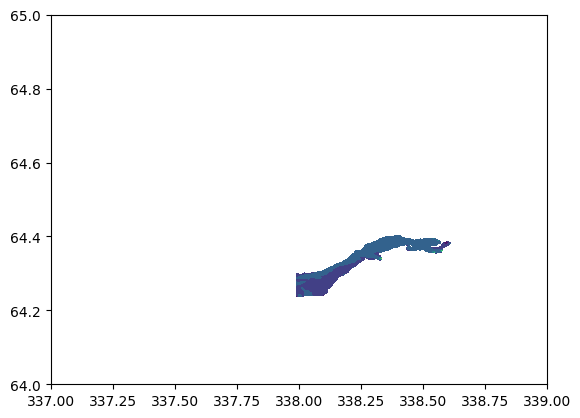

In [14]:
from matplotlib import pyplot as plt
plt.contourf(ds_regridded.lon,ds_regridded.lat,ds_regridded['PH'].isel(time=2))

In [5]:
mask_regrid=roms_regrid(grid,grid['mask_rho'])

In [6]:
ph_regrid=roms_regrid(grid,roms_bgc['PH'])

In [14]:
ph_anom_regrid=roms_regrid(grid,(roms_bgc['PH']-roms_bgc['PH_ALT_CO2']))

In [7]:
mask_regrid.load()

<xarray.DataArray (lat: 642, lon: 386)> Size: 2MB
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(642, 386))
Coordinates:
  * lon      (lon) float64 3kB 338.0 338.0 338.0 338.0 ... 338.6 338.7 338.7
  * lat      (lat) float64 5kB 64.24 64.24 64.24 64.24 ... 64.41 64.41 64.41
Attributes:
    regrid_method:  bilinear

In [8]:
ph_regrid.load()

<xarray.DataArray (time: 168, lat: 642, lon: 386)> Size: 167MB
array([[[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        ...,
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ]],

       [[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 4.837577 , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 8.142684 , ..., 0.       , 0.       ,
         0.       ],
...
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ]],

       [[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 4.838207 , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 8.143711 , ..., 0.       , 0.       ,
         0.       ],
        ...,
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ]]], shape=(168, 642, 386), dtype=float32)
Coordinates:
  * lon      (lon) float64 3kB 338.0 338.0 338.0 338.0 ... 338.6 338.7 338.7
  * lat      (lat) float64 5kB 64.24 64.24 64.24 64.24 ... 64.41 64.41 64.41
Dimensions without coordinates: time
Attributes:
    regrid_method:  bilinear

In [15]:
ph_anom_regrid.load()

<xarray.DataArray (time: 168, lat: 642, lon: 386)> Size: 167MB
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]],
      shape=(168, 642, 386), dtype=float32)
Coordinates:
  * lon      (lon) float64 3kB 338.0 338.0 338.0 338.0 ... 338.6 338.7 338.7
  * lat      (lat) float64 5kB 64.24 64.24 64.24 64.24 ... 64.41 64.41 64.41
Dimensions without coordinates: time
Attributes:
    regrid_method:  bilinear

2025-11-14 15:42:37 - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2025-11-14 15:42:37 - INFO - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 700x700 -pix_fmt rgba -framerate 5.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /tmp/tmpijkfgvfx/temp.m4v


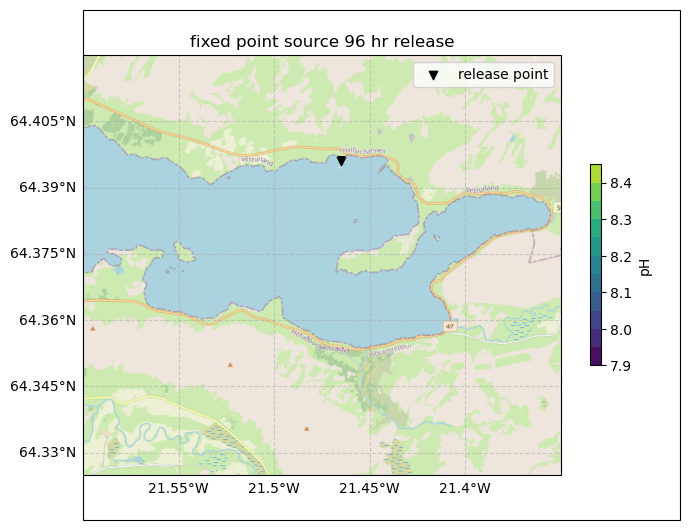

In [12]:
import cartopy.io.img_tiles as cimgt
import cartopy.crs as ccrs
request = cimgt.OSM()
extent = [-21.6, -21.35, 64.325, 64.42]

from matplotlib import pyplot as plt
from celluloid import Camera
import numpy as np
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(7,7),subplot_kw={'projection': ccrs.Mercator()},layout='tight')
camera = Camera(fig)
ax = plt.axes(projection=request.crs)
ax.set_extent(extent)

ax.add_image(request, 12)
k1=7.9
k2=8.5
k3=0.05
levels=np.arange(k1, k2, k3)
   

levels2=np.arange(0, 10, 1)

for i in range(167):
    
    ax.text(0.8, 0.999, 't='+str(i+1)+' hours', transform=ax.transAxes)

    cf2=plt.contourf(ph_regrid.lon,ph_regrid.lat,mask_regrid.where(mask_regrid!=0),levels2, cmap='Greys', transform=ccrs.PlateCarree())
    
    cf1=plt.contourf(ph_regrid.lon,ph_regrid.lat,ph_regrid[i,:,:],levels, vmin=7.9, vmax=8.5,transform=ccrs.PlateCarree())

    
    camera.snap()

    plt.title('fixed point source 96 hr release')
    
ax.scatter(-21.465, 64.396, color="black", marker="v", transform=ccrs.PlateCarree(),label= "release point")
gls=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                    color='darkgray', alpha=0.5, linestyle='--')
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels

ax.set_extent([-21.6, -21.35, 64.325, 64.42], ccrs.PlateCarree())
ax.legend()
cb1 = plt.colorbar(cf1,shrink=0.3)
cb1.set_label('pH', fontsize=10)

animation = camera.animate()
HTML(animation.to_html5_video())

In [13]:
animation.save("96_hr_30IBC_pH_withmap.mp4")

2025-11-14 15:50:51 - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2025-11-14 15:50:51 - INFO - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 700x700 -pix_fmt rgba -framerate 5.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y 96_hr_30IBC_pH_withmap.mp4


In [22]:
dye1_alk4_rg.shape

(168, 1442, 722)

2025-11-14 16:15:32 - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2025-11-14 16:15:32 - INFO - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 700x700 -pix_fmt rgba -framerate 5.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /tmp/tmpgekcdudb/temp.m4v


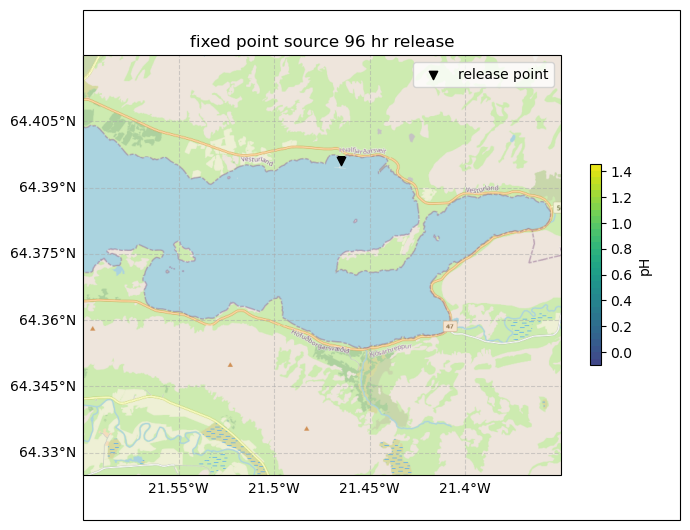

In [19]:
import cartopy.io.img_tiles as cimgt
import cartopy.crs as ccrs
request = cimgt.OSM()
extent = [-21.6, -21.35, 64.325, 64.42]

from matplotlib import pyplot as plt
from celluloid import Camera
import numpy as np
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(7,7),subplot_kw={'projection': ccrs.Mercator()},layout='tight')
camera = Camera(fig)
ax = plt.axes(projection=request.crs)
ax.set_extent(extent)

ax.add_image(request, 12)
k1=-0.1
k2=1.5
k3=0.05
levels=np.arange(k1, k2, k3)
   

levels2=np.arange(0, 10, 1)

for i in range(167):
    
    ax.text(0.8, 0.999, 't='+str(i+1)+' hours', transform=ax.transAxes)

    cf2=plt.contourf(ph_regrid.lon,ph_regrid.lat,mask_regrid.where(mask_regrid!=0),levels2, cmap='Greys', transform=ccrs.PlateCarree())
    
    cf1=plt.contourf(ph_regrid.lon,ph_regrid.lat,ph_anom_regrid[i,:,:],levels, vmin=-0.5, vmax=1.5,transform=ccrs.PlateCarree())

    
    camera.snap()

    plt.title('fixed point source 96 hr release')
    
ax.scatter(-21.465, 64.396, color="black", marker="v", transform=ccrs.PlateCarree(),label= "release point")
gls=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                    color='darkgray', alpha=0.5, linestyle='--')
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels

ax.set_extent([-21.6, -21.35, 64.325, 64.42], ccrs.PlateCarree())
ax.legend()
cb1 = plt.colorbar(cf1,shrink=0.3)
cb1.set_label('pH', fontsize=10)

animation = camera.animate()
HTML(animation.to_html5_video())